In [21]:
import pandas as pd
from bambi import Model
import arviz as az


In [30]:
sheets_url = "https://docs.google.com/spreadsheets/d/1L-PFpEH2DV4peaIfrazFdpUDtcQizgTwgmDVTe6b-xY/export?format=csv"
df = pd.read_csv(sheets_url)
df['log_od'] = np.log(df['od'])

print(df.head(10))

       temp        od  source  empty_vial    log_od
0  28.06250  0.041194  trial1           1 -3.189465
1  29.50000  0.040902  trial1           1 -3.196570
2  30.81250  0.040235  trial1           1 -3.213023
3  32.06250  0.039946  trial1           1 -3.220219
4  33.84375  0.039611  trial1           1 -3.228654
5  35.28125  0.039115  trial1           1 -3.241246
6  36.65625  0.038699  trial1           1 -3.251951
7  38.46875  0.038793  trial1           1 -3.249504
8  39.96875  0.038365  trial1           1 -3.260600
9  41.59375  0.038354  trial1           1 -3.260897


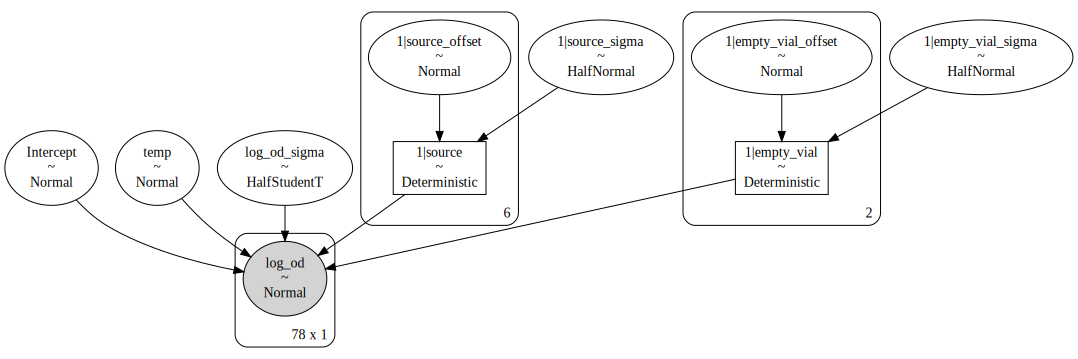

In [31]:
model = Model("log_od ~ temp + (1|source) + (1|empty_vial) + 1", df)
model.build()
model.graph()

In [32]:
results = model.fit(draws=2700, tune=1700, chains=3, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [log_od_sigma, 1|empty_vial_offset, 1|empty_vial_sigma, 1|source_offset, 1|source_sigma, temp, Intercept]


Sampling 3 chains for 1_700 tune and 2_700 draw iterations (5_100 + 8_100 draws total) took 1147 seconds.
There were 1224 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 1280 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 648 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


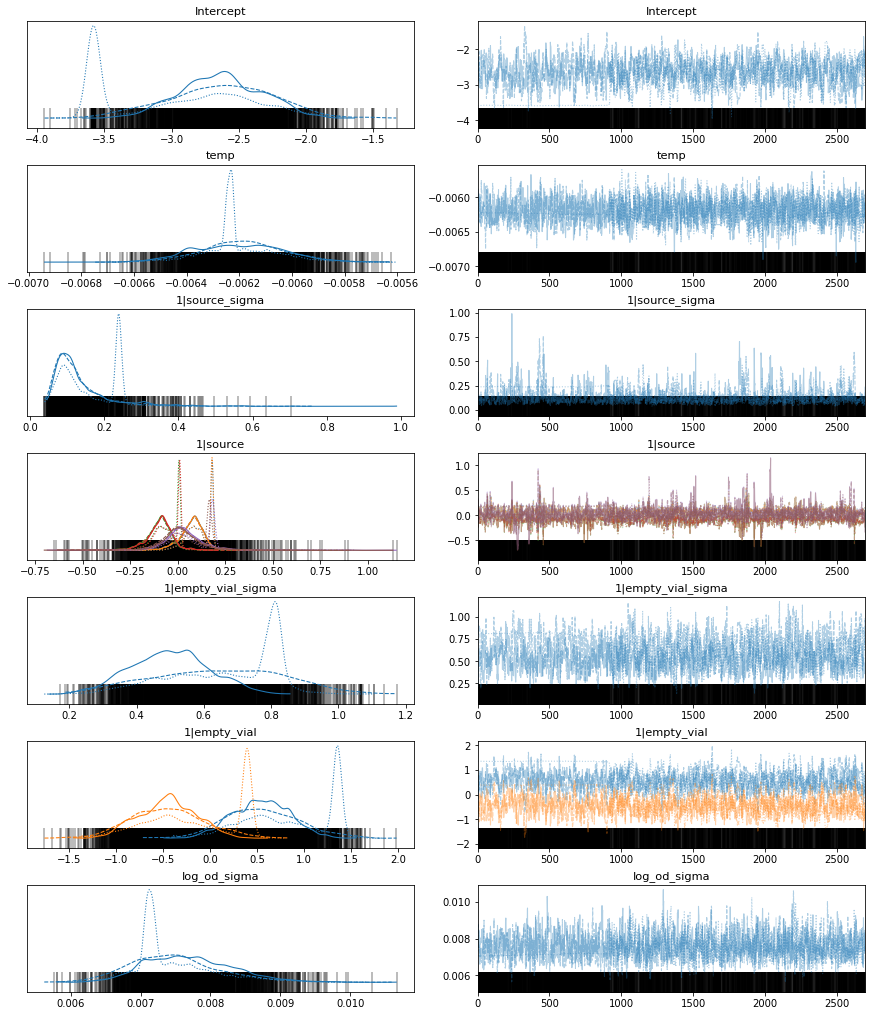

In [33]:
az.plot_trace(results);

In [34]:
az.summary(results, round_to=10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-2.750119,0.453254,-3.595666,-2.104653,0.156989,0.122818,10.457729,16.508408,1.204776
temp,-0.006199,0.000160,-0.006497,-0.005882,0.000004,0.000003,1699.909950,1976.239127,1.093332
1|source_sigma,0.143331,0.079365,0.042490,0.260315,0.015753,0.011270,27.335142,888.794328,1.077524
1|source[0],0.089425,0.076213,-0.055909,0.197823,0.013451,0.009599,25.519293,760.479024,1.086877
1|source[1],0.089014,0.076133,-0.061785,0.193465,0.013406,0.009567,24.874776,782.650284,1.086991
1|source[2],-0.084537,0.076180,-0.235652,0.019054,0.013474,0.009616,24.775188,588.724039,1.087282
1|source[3],-0.080945,0.076214,-0.233206,0.021084,0.013488,0.009626,24.030367,483.308666,1.087262
1|source[4],0.050699,0.117607,-0.169689,0.212299,0.022253,0.015902,24.263413,956.205400,1.086689
1|source[5],0.035880,0.117496,-0.184486,0.196648,0.022138,0.015819,24.256676,884.056978,1.086260
1|empty_vial_sigma,0.604678,0.176734,0.285556,0.893433,0.050938,0.037950,13.884293,150.120167,1.147467
